In [1]:
from google.colab import drive
drive.mount('/content/drive')

train_dir = "/content/drive/MyDrive/AI Level 6/FruitinAmazon/train"
test_dir = "/content/drive/MyDrive/AI Level 6/FruitinAmazon/test"



Mounted at /content/drive


Found 6 classes: ['acai', 'cupuacu', 'graviola', 'guarana', 'pupunha', 'tucuma']


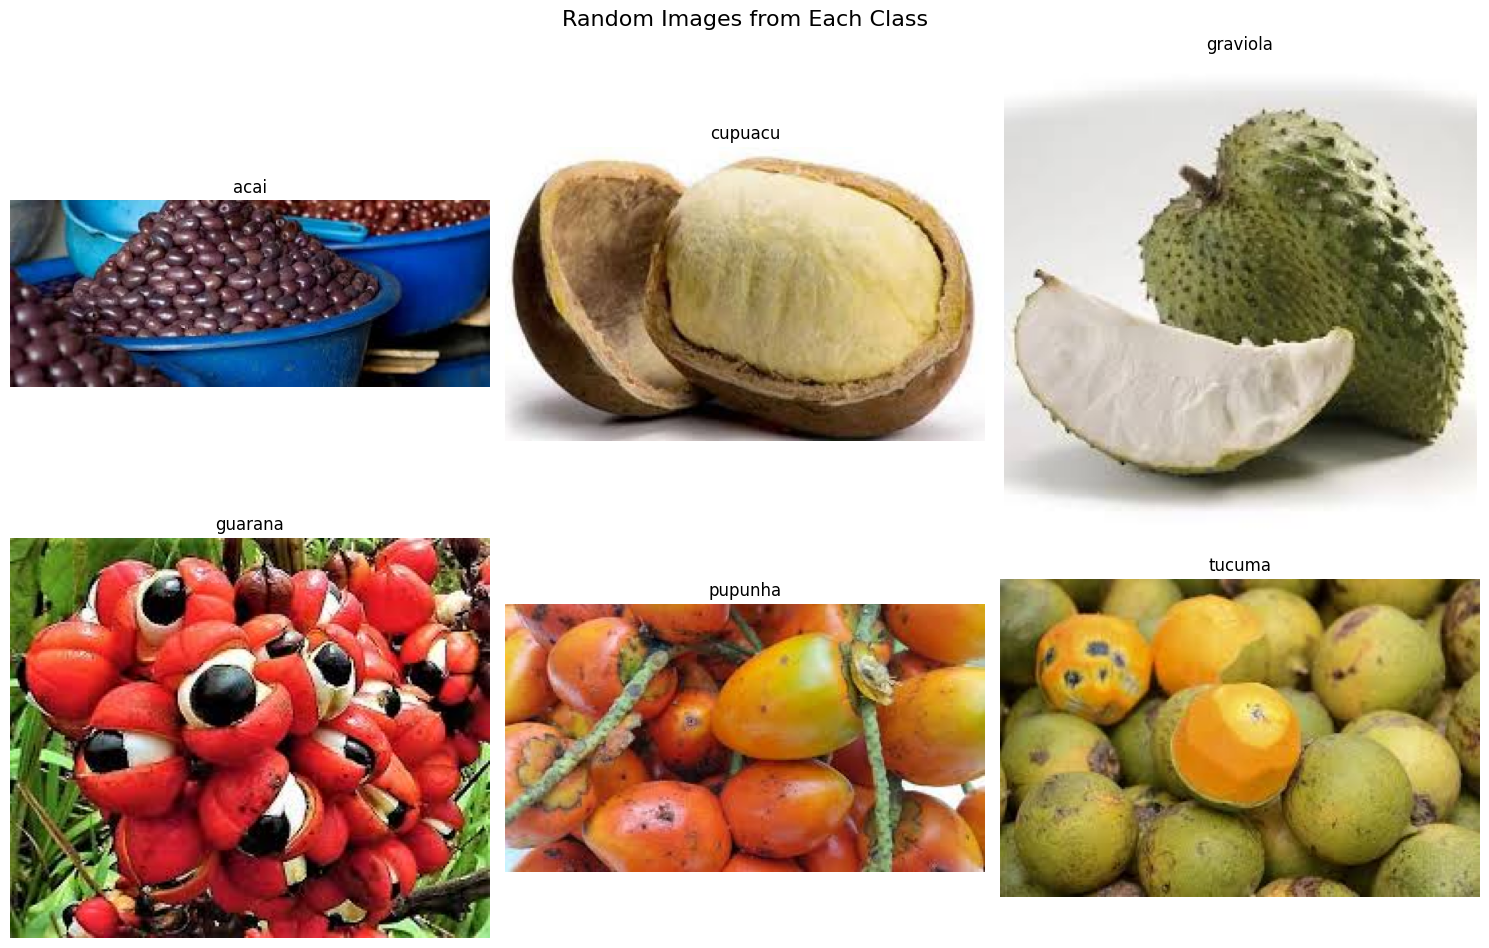

In [2]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Get class names from the training directory
class_dirs = [d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]
class_dirs.sort()  # Sort for consistent order
print(f"Found {len(class_dirs)} classes: {class_dirs}")

images = []
class_names = []
for class_dir in class_dirs:
    class_path = os.path.join(train_dir, class_dir)
    image_files = [f for f in os.listdir(class_path) if f.endswith(('.jpg', '.jpeg', '.png'))]
    if image_files:  # Ensure there’s at least one image
        random_image = random.choice(image_files)
        image_path = os.path.join(class_path, random_image)
        images.append(image_path)
        class_names.append(class_dir)

if not images:
    raise ValueError("No images found in the dataset!")

# Plot random images from each class
rows = 2
cols = (len(images) + 1) // 2  # Ceiling division to fit all classes
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))  # Adjust figure size as needed
fig.suptitle("Random Images from Each Class", fontsize=16)

axes = axes.flatten()
for i, (image_path, class_name) in enumerate(zip(images, class_names)):
    img = mpimg.imread(image_path)
    axes[i].imshow(img)
    axes[i].set_title(class_name)
    axes[i].axis('off')  # Hide axes

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import numpy as np

train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(128, 128),
    batch_size=16,
    label_mode='categorical',
    shuffle=True
)

test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(128, 128),
    batch_size=16,
    label_mode='categorical',
    shuffle=False
)

class_names = train_dataset.class_names
print(f"Class names: {class_names}")

num_classes = len(class_names)

def normalize_img(image, label):
    return tf.cast(image, tf.float32) / 255.0, label

train_dataset = train_dataset.map(normalize_img)
test_dataset = test_dataset.map(normalize_img)

model = keras.Sequential([
    keras.Input(shape=(128, 128, 3)),
    layers.Conv2D(32, (3, 3), padding='same', strides=1, activation="relu"),
    layers.MaxPooling2D((2, 2), strides=2),
    layers.Conv2D(32, (3, 3), padding='same', strides=1, activation="relu"),
    layers.MaxPooling2D((2, 2), strides=2),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(num_classes, activation="softmax")
])

model.summary()

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

checkpoint = ModelCheckpoint(
    'best_model.keras',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=20,
    mode='max',
    verbose=1
)

history = model.fit(
    train_dataset,
    epochs=250,
    validation_data=test_dataset,
    callbacks=[checkpoint, early_stopping]
)

test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.2f}")

for images, labels in test_dataset.take(1):
    predictions = model.predict(images)
    predicted_labels = np.argmax(predictions, axis=1)
    actual_labels = np.argmax(labels, axis=1)
    print("Predicted labels:", predicted_labels[:5])
    print("Actual labels: ", actual_labels[:5])
    break


Found 90 files belonging to 6 classes.
Found 30 files belonging to 6 classes.
Class names: ['acai', 'cupuacu', 'graviola', 'guarana', 'pupunha', 'tucuma']


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       2,097,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,116,454 (8.07 MB)

 Trainable params: 2,116,454 (8.07 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/250
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.1654 - loss: 2.5956
Epoch 1: val_accuracy improved from -inf to 0.16667, saving model to best_model.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 34s 5s/step - accuracy: 0.1624 - loss: 2.5835 - val_accuracy: 0.1667 - val_loss: 2.0885
Epoch 2/250
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.1693 - loss: 1.9346
Epoch 2: val_accuracy did not improve from 0.16667
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.1721 - loss: 1.9276 - val_accuracy: 0.1667 - val_loss: 1.7723
Epoch 3/250
5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.1206 - loss: 1.7662
Epoch 3: val_accuracy did not improve from 0.16667
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.1274 - loss: 1.7602 - val_accuracy: 0.1667 - val_loss: 1.6588
Epoch 4/250
5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.2696 - loss: 1.6751
Epoch 4: val_accuracy improved from 0.16667 to 0.40000, saving model to best_model.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy

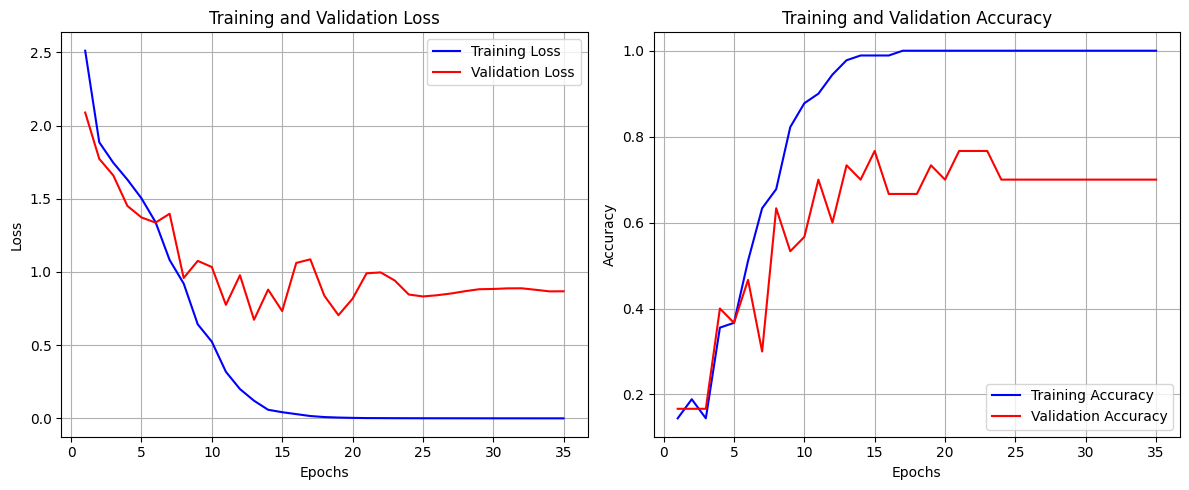

In [4]:
history_dict = history.history
epochs = range(1, len(history_dict['loss']) + 1)
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']
train_acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'b-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [5]:
model.save('SabinShrestha_Worksheet05.h5')
loaded_model = keras.models.load_model('SabinShrestha_Worksheet05.h5')

print('Model saved to SabinShrestha_Worksheet05.h5')
print('Model loaded from SabinShrestha_Worksheet05.h5')

Model saved to SabinShrestha_Worksheet05.h5
Model loaded from SabinShrestha_Worksheet05.h5


In [6]:
from sklearn.metrics import classification_report

loaded_model = keras.models.load_model('SabinShrestha_Worksheet05.h5')
print("Model loaded for predictions")

all_images = []
all_labels = []
for images, labels in test_dataset:
    all_images.append(images.numpy())
    all_labels.append(labels.numpy())

test_images = np.concatenate(all_images, axis=0)
test_labels_onehot = np.concatenate(all_labels, axis=0)

predictions = loaded_model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels_onehot, axis=1)

print(f"Class names: {class_names}")

report = classification_report(true_labels, predicted_labels, target_names=class_names)
print("Classification Report:\n", report)


Model loaded for predictions
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 687ms/step
Class names: ['acai', 'cupuacu', 'graviola', 'guarana', 'pupunha', 'tucuma']
Classification Report:
               precision    recall  f1-score   support

        acai       0.71      1.00      0.83         5
     cupuacu       0.50      0.40      0.44         5
    graviola       0.57      0.80      0.67         5
     guarana       0.80      0.80      0.80         5
     pupunha       0.80      0.80      0.80         5
      tucuma       1.00      0.40      0.57         5

    accuracy                           0.70        30
   macro avg       0.73      0.70      0.69        30
weighted avg       0.73      0.70      0.69        30

